<a href="https://colab.research.google.com/github/it20649708/Deep-Learning-Lab02-2023/blob/main/ex_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [32]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.utils import to_categorical
from matplotlib import pyplot as plt
import numpy as np

from tensorflow.keras.regularizers import l1, l2


Load the MNIST dataset

In [2]:
(train_data,train_target),(test_data,test_target) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


Visualize the dataset

Target labels:  [5 7 6 7 6 6 7 7 2 9]


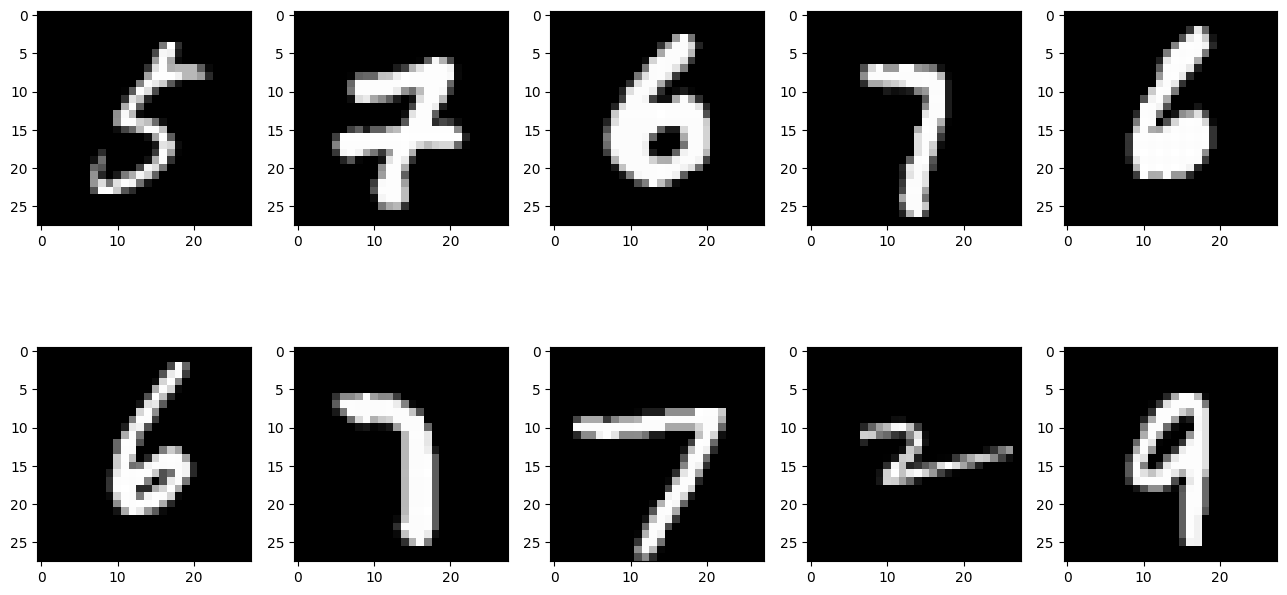

In [18]:
fig, axs = plt.subplots(2, 5, figsize=(16,8))
random_numbers = np.random.randint(0, 60000, 10)
print('Target labels: ',train_target[random_numbers])
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(train_data[random_numbers[idx]],cmap='gray')
plt.show()

Pre-processing stage

In [19]:
new_train_data = train_data/255.0
new_test_data=test_data/255.0

new_train_target = to_categorical(train_target)
new_test_target = to_categorical(test_target)

Create the Model architecture

In [5]:
model=Sequential()

model.add(Flatten(input_shape=(28,28)))

model.add(Dense(64,activation='relu'))
model.add(Dense(64,input_dim=64,activation='relu'))
model.add(Dense(32,input_dim=64,activation='relu'))
model.add(Dense(10,input_dim=32,activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 64)                4160      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


Train the model

In [24]:
train_info = model.fit(new_train_data , new_train_target , epochs = 20)

Epoch 1/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0118 - accuracy: 0.9963
Epoch 2/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0146 - accuracy: 0.9953
Epoch 3/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0091 - accuracy: 0.9968
Epoch 4/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0130 - accuracy: 0.9956
Epoch 5/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0123 - accuracy: 0.9961
Epoch 6/20
1875/1875 [==============================] - 7s 3ms/step - loss: 0.0119 - accuracy: 0.9963
Epoch 7/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0103 - accuracy: 0.9967
Epoch 8/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0109 - accuracy: 0.9964
Epoch 9/20
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0115 - accuracy: 0.9966
Epoch 10/20
1875/1875 [==============================] - 7s 4ms/step - loss: 0.009

Plot the loss and accuracy graphs

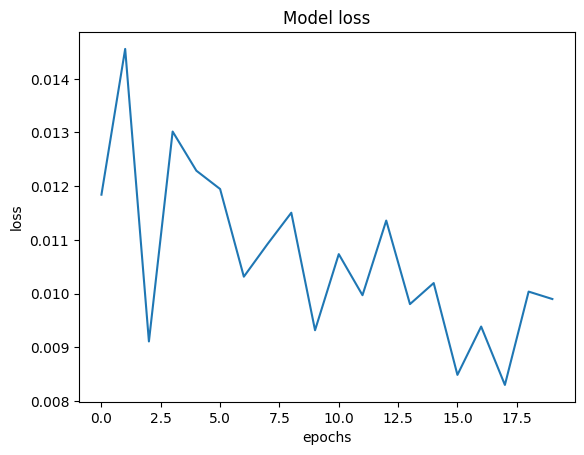

In [25]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

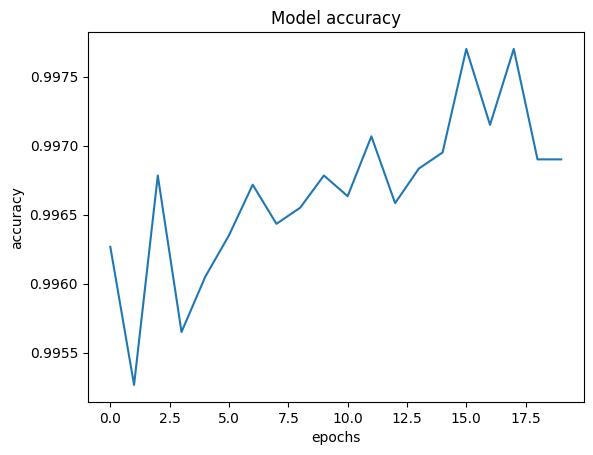

In [26]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

Test the performance of Model

In [27]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.1899 - accuracy: 0.9757
Loss of the Test dataset is: 0.18991625308990479
Accuracy of the test dataset is: 0.9757000207901001


Save the model weights

In [11]:
model.save_weights('MNIST_WEIGHTS_V1.h5')



In [42]:
#Add L1 and L2

# Create a Sequential model
model = Sequential()


model.add(Flatten(input_shape=(28, 28)))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(64, activation='relu', kernel_regularizer=l1(0.01)))
model.add(Dense(32, activation='relu', kernel_regularizer=l1(0.01), activity_regularizer=l2(0.01)))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [43]:
model.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_10 (Flatten)        (None, 784)               0         
                                                                 
 dense_26 (Dense)            (None, 64)                50240     
                                                                 
 dense_27 (Dense)            (None, 64)                4160      
                                                                 
 dense_28 (Dense)            (None, 32)                2080      
                                                                 
 dense_29 (Dense)            (None, 10)                330       
                                                                 
Total params: 56,810
Trainable params: 56,810
Non-trainable params: 0
_________________________________________________________________


In [44]:
train_info = model.fit(new_train_data , new_train_target , epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 8s 4ms/step - loss: 1.7313 - accuracy: 0.8438
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.8748 - accuracy: 0.8922
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.7357 - accuracy: 0.9027
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6612 - accuracy: 0.9106
Epoch 5/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.6130 - accuracy: 0.9170
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5783 - accuracy: 0.9200
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5572 - accuracy: 0.9220
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5466 - accuracy: 0.9224
Epoch 9/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.5358 - accuracy: 0.9226
Epoch 10/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.526

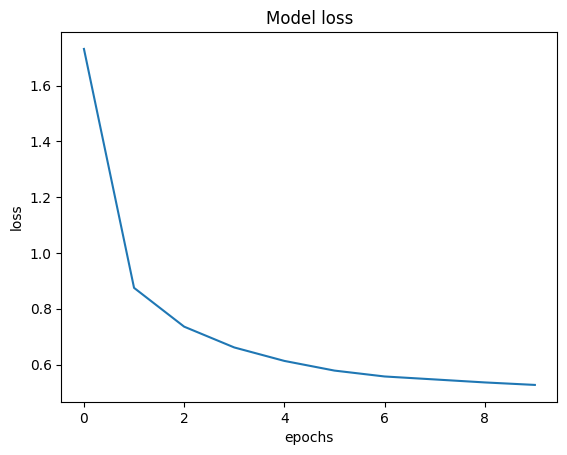

In [45]:
plt.plot(train_info.history['loss'])
plt.xlabel('epochs')
plt.ylabel('loss')
plt.title('Model loss')
plt.show()

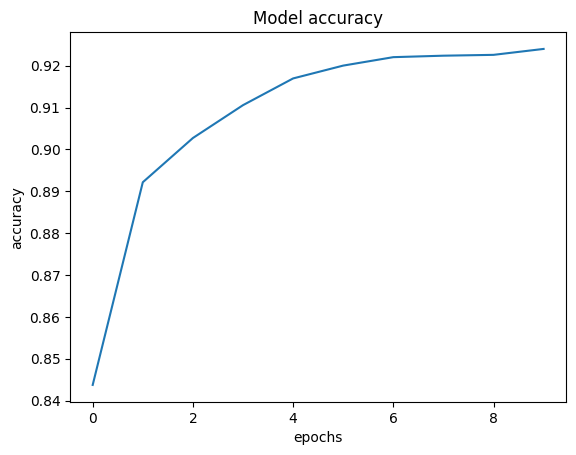

In [46]:
plt.plot(train_info.history['accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.title('Model accuracy')
plt.show()

In [47]:
loss, acc = model.evaluate(new_test_data , new_test_target)
print(f'Loss of the Test dataset is: {loss}\nAccuracy of the test dataset is: {acc}')

313/313 [==============================] - 1s 2ms/step - loss: 0.5243 - accuracy: 0.9218
Loss of the Test dataset is: 0.5243235230445862
Accuracy of the test dataset is: 0.9218000173568726


In [48]:
model.save_weights('MNIST_WEIGHTS_V1.h6')